In [ ]:
from google.colab import files
uploaded = files.upload()


Saving smile_detection_dataset_updated.zip to smile_detection_dataset_updated.zip


In [ ]:
import zipfile

with zipfile.ZipFile("smile_detection_dataset_updated.zip",'r') as zip_ref:
  zip_ref.extractall("smile_detection_dataset_updated")

In [ ]:
import os

base_path='smile_detection_dataset_updated'

print(os.listdir(base_path))

print(os.listdir(os.path.join(base_path, "smile")))

['labels.csv', 'neutral', 'smile']
['smile_9.png', 'smile_3.png', 'smile_5.png', 'smile_8.png', 'smile_4.png', 'smile_7.png', 'smile_2.png', 'smile_10.png', 'smile_1.png', 'smile_6.png']


In [ ]:
from PIL import Image

pixel_intensities=[]
labels = []

folders=[("smile", 1), ("neutral", 0)]

for folderName,label in folders:
  folder_path= os.path.join(base_path,folderName)
  for filename in os.listdir(folder_path):
    image = Image.open(os.path.join(folder_path,filename)).convert('1')
    pixel_intensities.append(list(image.getdata()))
    labels.append(label)

print(*pixel_intensities,*labels, sep='\n')



[0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

In [ ]:
import numpy as np
print(np.array(pixel_intensities))
pixel_intensities=np.array(pixel_intensities)/255.0
labels=np.array(labels)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255   0 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
print(pixel_intensities,labels)

print(pixel_intensities.shape, labels.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
(20, 4096) (20,)


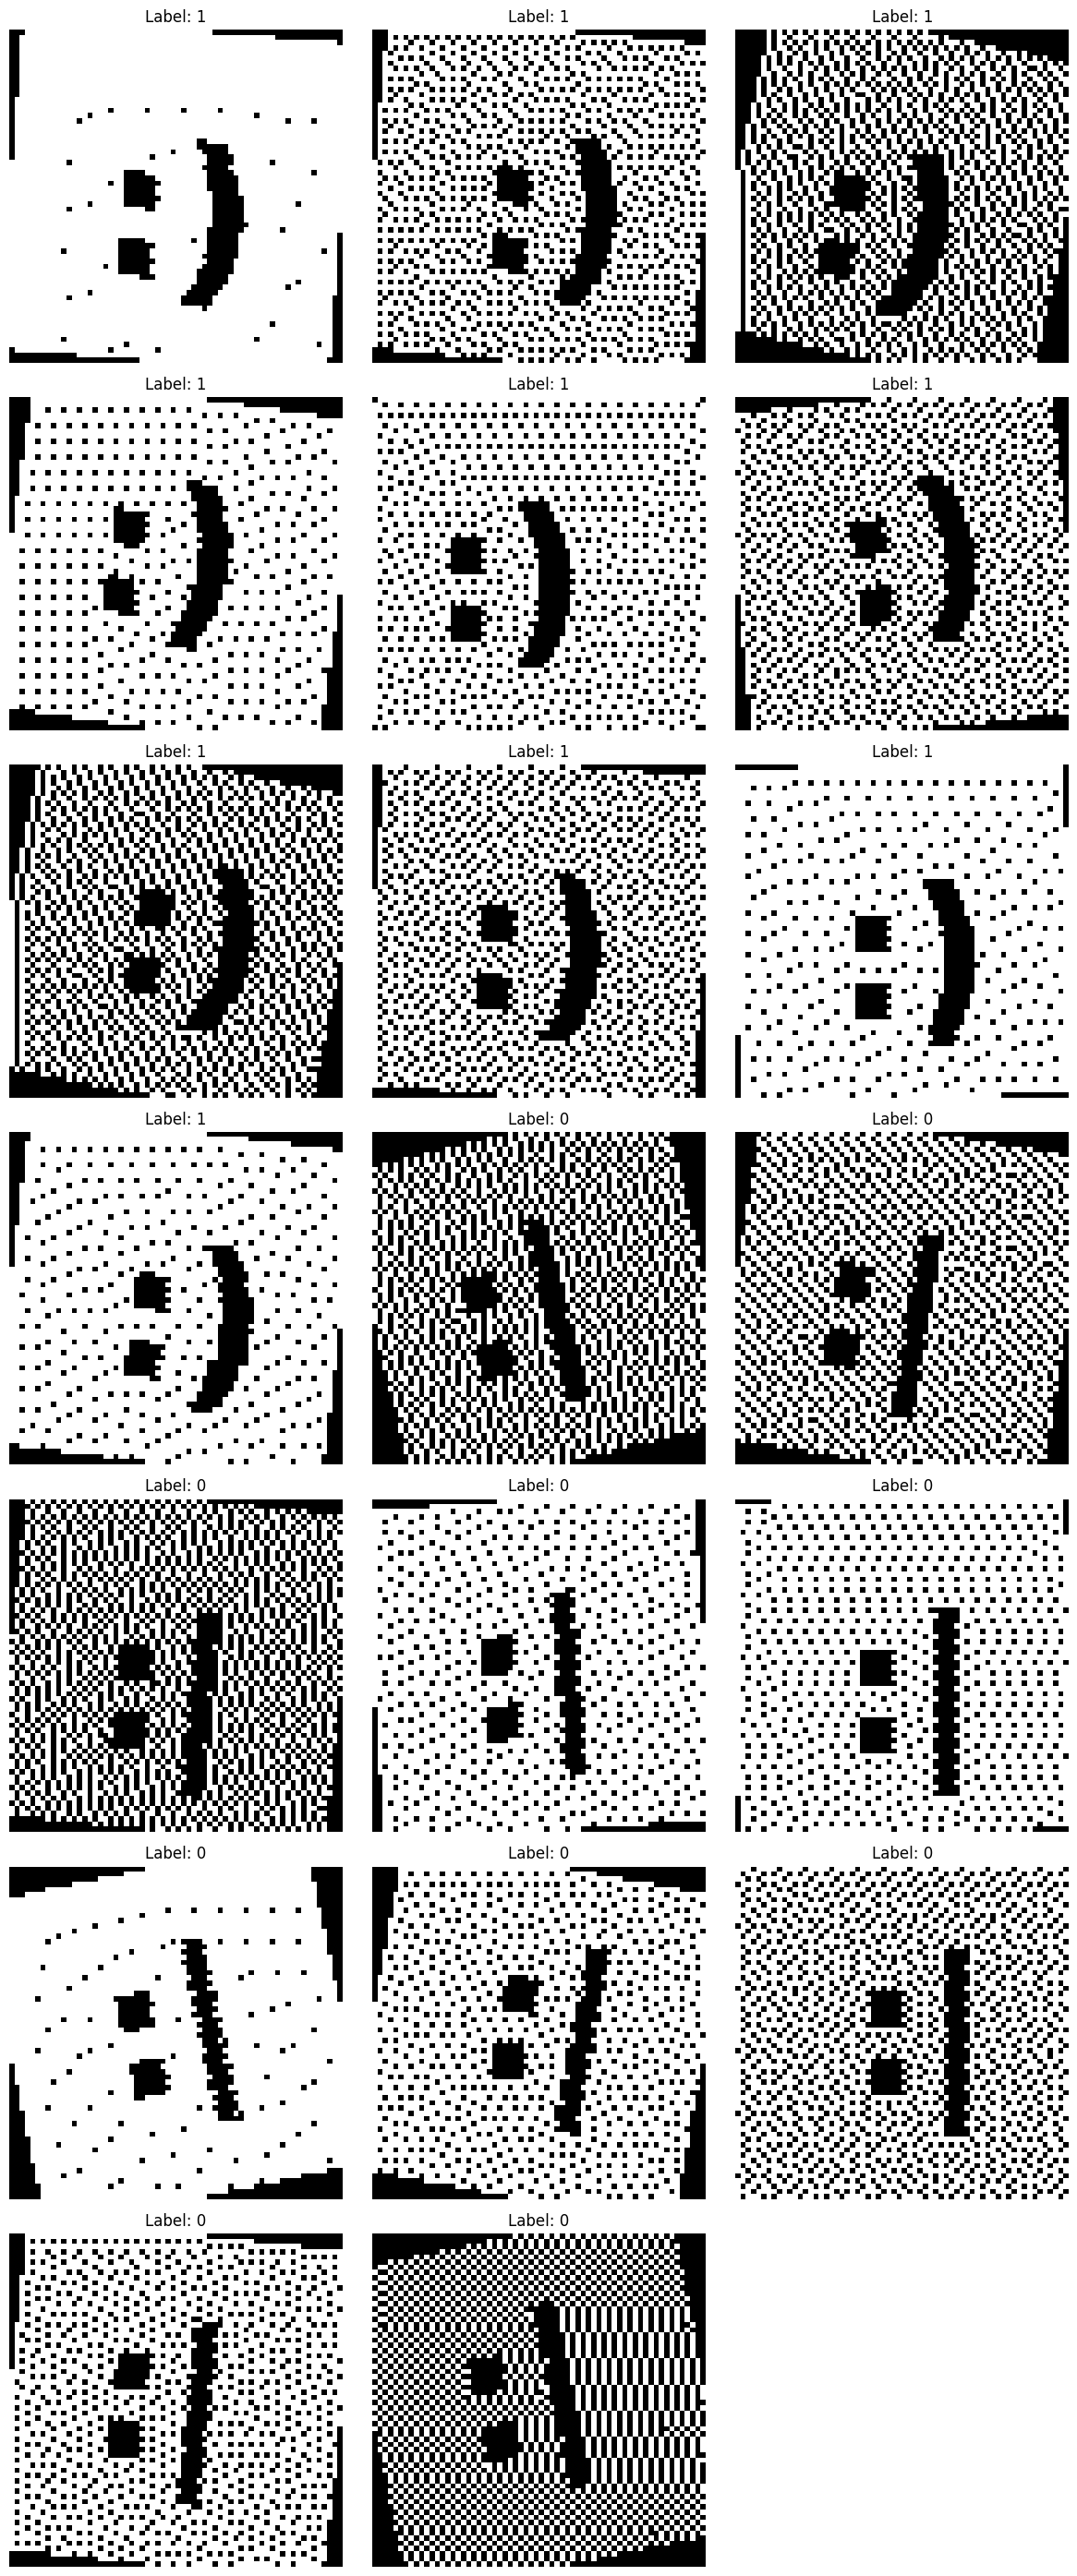

In [ ]:
import matplotlib.pyplot as plt

num_images = len(pixel_intensities)
cols = 3
rows = (num_images + cols - 1) // cols  # Compute required rows

plt.figure(figsize=(12, 4 * rows))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(pixel_intensities[i].reshape(64, 64), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

model = Sequential([
    Dense(512, activation='relu', input_dim=4096),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax'),
])


labels=to_categorical(labels,num_classes=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Dense Layer Thumb Rules (Deep Learning Quick Reference)

 **What:**  
A Dense (fully connected) layer computes `y = f(Wx + b)`, connecting **all previous neurons to all current neurons**.

---

## How to Choose `units`

No strict formula, but **practical thumb rules:**

- **Input Layer:**
  - `input_dim = number of input features`
  - Example: 64x64 grayscale → 4096.

- **Hidden Layers:**
  - Start with `0.25x - 0.5x` input size for small/simple data.
  - Can use up to `1x` input size for complex data.
  - **Reduce units gradually** in deeper layers.

- **Output Layer:**
  - Binary classification → `Dense(1, activation='sigmoid')`, `loss='binary_crossentropy'`.
  - Multi-class classification → `Dense(num_classes, activation='softmax')`, `loss='categorical_crossentropy'`.

---

## When to Use Dropout

 Helps prevent overfitting, especially with large Dense layers:
- Use `Dropout(0.2 - 0.5)` after Dense layers.
- Recommended for small datasets or large models.

---

## Example Practical ANN Architecture

For **64x64 grayscale smile detection:**

```python
model = Sequential([
    Dense(512, activation='relu', input_dim=4096),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [ ]:
print(pixel_intensities.shape,labels.shape)
print(labels)

(20, 4096) (20, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from keras.optimizers import  Adam

optimizer = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model.fit(pixel_intensities,labels,epochs=1000,batch_size=20,verbose=2)

Epoch 1/1000
1/1 - 3s - 3s/step - accuracy: 0.4500 - loss: 1.8085
Epoch 2/1000
1/1 - 1s - 669ms/step - accuracy: 0.5000 - loss: 49.5370
Epoch 3/1000
1/1 - 0s - 59ms/step - accuracy: 0.6500 - loss: 5.0271
Epoch 4/1000
1/1 - 0s - 57ms/step - accuracy: 0.6500 - loss: 3.9549
Epoch 5/1000
1/1 - 0s - 31ms/step - accuracy: 0.6500 - loss: 3.6635
Epoch 6/1000
1/1 - 0s - 32ms/step - accuracy: 0.5500 - loss: 3.3412
Epoch 7/1000
1/1 - 0s - 31ms/step - accuracy: 0.6000 - loss: 1.8067
Epoch 8/1000
1/1 - 0s - 57ms/step - accuracy: 0.6000 - loss: 2.6594
Epoch 9/1000
1/1 - 0s - 34ms/step - accuracy: 0.6000 - loss: 3.0409
Epoch 10/1000
1/1 - 0s - 58ms/step - accuracy: 0.4500 - loss: 3.6702
Epoch 11/1000
1/1 - 0s - 30ms/step - accuracy: 0.5500 - loss: 3.2240
Epoch 12/1000
1/1 - 0s - 59ms/step - accuracy: 0.5500 - loss: 1.7235
Epoch 13/1000
1/1 - 0s - 31ms/step - accuracy: 0.6000 - loss: 1.9023
Epoch 14/1000
1/1 - 0s - 31ms/step - accuracy: 0.5500 - loss: 2.4253
Epoch 15/1000
1/1 - 0s - 33ms/step - accura

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_smile.png to test_smile.png


In [ ]:
from PIL import Image
import numpy as np

# Load the uploaded image
img = Image.open('test_smile.png').convert('1')


# Convert to numpy array and normalize
img_array = np.array(img) / 255.0

# Flatten to match ANN input shape
img_flat = img_array.reshape(1, -1)  # shape: (1, 4096)

print(img_flat.shape)  # Should be (1, 4096)


(1, 4096)


In [ ]:
prediction = model.predict(img_flat)
print(prediction)

predicted_class = np.argmax(prediction, axis=1)[0]
if predicted_class == 1:
    print("Predicted: Smiling 😊")
else:
    print("Predicted: Neutral 😐")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
[[0.51983917 0.4801608 ]]
Predicted: Neutral 😐
